In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

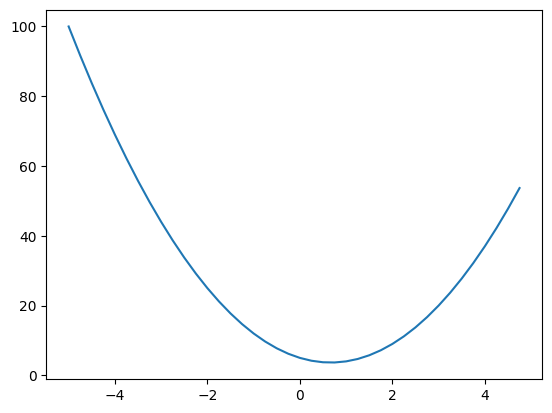

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys) # Obtenemos una parábola puesto que estamos utilizando una 
# función con x^2

Ahora, queremos saber cuál es la derivada de esta función en cada punto de ella.
Para poder tomar la derivada, la función ha de ser continua.

In [5]:
h = 0.001
x = -3.0 # Si nos fijamos en la función, si nos vamos a una 'x' negativa, la pendiente a su vez, será negativa.
(f(x + h) - f(x)) / h # Lo que estamos obteniendo aquí es la pendiente.

-21.996999999998934

In [6]:
h = 0.000001
x = 2/3 # Ahora nos estamos yendo casi el mínimo local, donde la pendiente se aproxima a 0. Sólo tenemos que observar como sería la inclinación de la pendiente en ese punto de la función.
(f(x + h) - f(x)) / h # Lo que estamos obteniendo aquí es la pendiente.

2.999378523327323e-06

In [7]:
# Vamos a aumentar un poco la complejidad.

a = 2.0
b = -3.0 
c = 10.0
d = a*b + c
print(d)

4.0


In [8]:
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1/h)) # Estamos obteniendo la pendiente.

d1 4.0
d2 3.997
slope -3996.003


In [35]:
class Value:

    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op # Esto hace referencia al operador. 
        self.label = label # Esto hace referencia la etiqueta.

    def __repr__(self):
        return f"Value(data = {self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def tanh(self):
        x = self.data
        t = (mt.exp(2*x) - 1)/(mt.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
d = a*b; d.label = 'd'
e = d+c; e.label = 'e'
f = Value(-2.0, label = 'f')
L = e * f; L.label = 'L'
L

Value(data = -8.0)

In [10]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

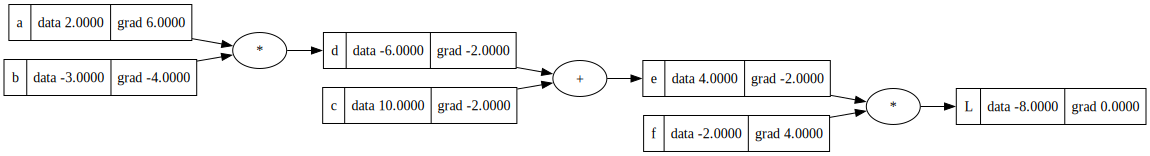

In [28]:
draw_dot(L)

Para calcular 'backpropagation' lo que vamos a hacer es empezar desde 'L' y calcular el gradiente de todos los valores intermedios hasta el principio de la red.
En 'backpropagation' lo que vamos a hacer es computar la derivada de cada uno de los nodos con respecto a L, debido a que 'L' es nuestro ouput final.

Vamos a estar muy interesados en conocer la derivada de esta función de coste L con respecto a los pesos de la red neuronal.

Lo que vamos a ejecutar aquí abajo es un primer paso de optimización.
Lo que estamos haciendo es actualizar los valores de nuestra red a través de su gradiente. 

In [29]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

d = a * b
e = d + c
L = e * f

print(L.data)

-7.286496


In [26]:
def lol():
    
    h = 0.001
    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    L = e * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    d = a*b; d.label = 'd'
    e = d + c; e.label = 'e'
    f = Value(-2.0, label = 'f')
    L = e * f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

lol()

0.0


L = e * f

Queremos saber cuanto es dL/de = f

Sabemos que la notación de la derivada es:
(f(x+h) - f(x))/h

Entonces:
((e+h)*f - e*f)/h
(e*f + h*f - e*f)/h
h*f/h
f

Por tanto, por regla de 3, si dL/de = f, dL/df = e.

Los pesos quedarían actualizados de la siguiente forma:
- W_nuevo = W_viejo - alpha * dL/dW -> Esto es si queremos actualizar el peso de la neurona correspondiente a e. | alpha = Learning rate.

Sí queremos saber cuanto es dL/dc, tenemos que hacer la regla de la cadena, es decir: dL/dc = dL/dd * dd/dc.
Por tanto, primero tenemos que saber cuanot es dd/dc.

d = c + e; la derivada de esto con respecto a c = 1.0.

(f(x+h) - f(x)/h) -> Definición de la derivada.

((c + h + e) - (c+e))/h

(c + h + e - c - e) / h

h / h = 1.0

Por tanto, ya sabemos que dd/dc = 1.0, con lo cual dd/de = 1.0. -> Estas serían derivadas locales.

Por otro lado, la notación de la regla de la cadena es: f'(g(x)) * g'(x)

Al tener ya las derivadas locales, esto sería tan fácil como hacer: 
dL/dc = dL/de * de/dc -> dL/dc = -2 * 1 = -2.0

Si quisiéramos ir más atrás, deberíamos de continuar con la regla de la cadena. 

En la primera capa tenemos a y b.

Para obtener dL/da deberíamos de obtener:
- dL/de, de/dd, dd/da.

Ahora mismo lo que nos interesa saber es cuanto es dc/da.

d = a * b

Por tanto:
- dd/da = b.
- dd/db = a.

Haciendo la regla de la cadena, sería:

dL/da = dL/de * de/dd * dd/da -> -2 * 1 * (-3) = 6.0

dL/db = dL/de * de/dd * dd/da -> -2 * 1 * (2) = -4.0


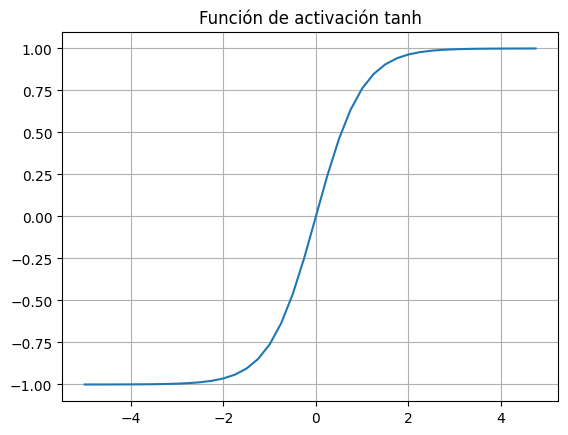

In [33]:
plt.plot(np.arange(-5, 5, 0.25), np.tanh(np.arange(-5, 5, 0.25))); plt.grid();
plt.title('Función de activación tanh')
plt.show()

Podemos ver que el rango de esta función es [-1, 1]

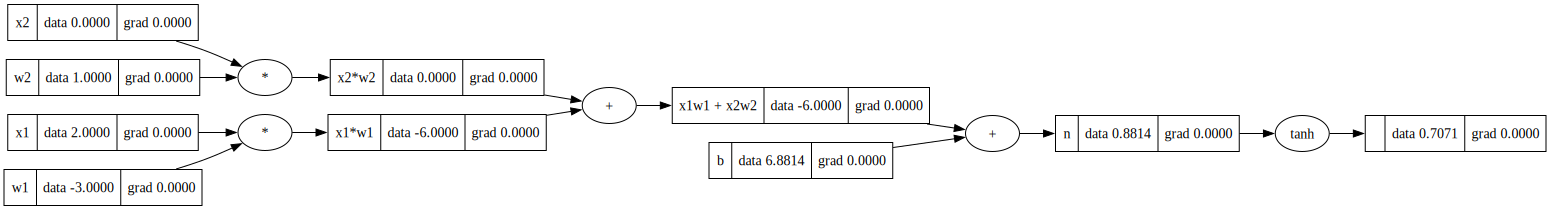

In [40]:
# inputs x1, x2.
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2.
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias of the neuron.
b = Value(6.8813735870195432, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh()

draw_dot(o)